In [16]:
!pip install statsbombpy
!pip install mplsoccer
!pip install cmasher
!pip install highlight-text


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [17]:
import math
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch, Sbopen, FontManager
from mplsoccer import Pitch
from mplsoccer import Pitch, VerticalPitch, add_image, FontManager, Sbopen
import warnings
from highlight_text import ax_text
import numpy as np
import cmasher as cmr
from statsbombpy import sb
import pandas as pd



In [18]:
sb.competitions()

competition_id  season_id   country_name        competition_name  \
0                9        281        Germany           1. Bundesliga   
1                9         27        Germany           1. Bundesliga   
2             1267        107         Africa  African Cup of Nations   
3               16          4         Europe        Champions League   
4               16          1         Europe        Champions League   
..             ...        ...            ...                     ...   
69              55         43         Europe               UEFA Euro   
70              35         75         Europe      UEFA Europa League   
71              53        106         Europe       UEFA Women's Euro   
72              72        107  International       Women's World Cup   
73              72         30  International       Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False                      False   
2                male              False                       True   
3                male              False                      False   
4                male              False                      False   
..                ...                ...                        ...   
69               male              False                       True   
70               male              False                      False   
71             female              False                       True   
72             female              False                       True   
73             female              False                       True   

   season_name               match_updated           match_updated_360  \
0    2023/2024  2024-07-15T14:15:54.671676  2024-07-15T14:17:00.877356   
1    2015/2016  2024-05-19T11:11:14.192381                        None   
2         2023  2024-06-13T07:51:02.452825                        None   
3    2018/2019  2024-06-12T07:44:38.559714     2021-06-13T16:17:31.694   
4    2017/2018  2024-02-13T02:35:28.134882     2021-06-13T16:17:31.694   
..         ...                         ...                         ...   
69        2020  2024-04-16T12:44:40.558402  2024-04-16T12:47:18.505110   
70   1988/1989  2024-02-12T14:45:05.702250     2021-06-13T16:17:31.694   
71        2022  2024-02-13T13:27:17.178263  2024-02-13T13:30:52.820588   
72        2023  2024-07-14T16:59:48.469596  2024-07-14T17:01:38.887279   
73        2019  2024-02-13T09:41:26.379767     2021-06-13T16:17:31.694   

           match_available_360             match_available  
0   2024-07-15T14:17:00.877356  2024-07-15T14:15:54.671676  
1                         None  2024-05-19T11:11:14.192381  
2                         None  2024-06-13T07:51:02.452825  
3                         None  2024-06-12T07:44:38.559714  
4                         None  2024-02-13T02:35:28.134882  
..                         ...                         ...  
69  2024-04-16T12:47:18.505110  2024-04-16T12:44:40.558402  
70                        None  2024-02-12T14:45:05.702250  
71  2024-02-13T13:30:52.820588  2024-02-13T13:27:17.178263  
72  2024-07-14T17:01:38.887279  2024-07-14T16:59:48.469596  
73                        None  2024-02-13T09:41:26.379767  

[74 rows x 12 columns]

In [19]:
sb.matches(competition_id=43, season_id=106)

match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_team  home_score  away_score match_status  ...  \
0        Serbia  Switzerland           2           3    available  ...   
1     Argentina    Australia           2           1    available  ...   
2     Australia      Denmark           1           0    available  ...   
3        Brazil       Serbia           2           0    available  ...   
4       Tunisia    Australia           0           1    available  ...   
..          ...          ...         ...         ...          ...  ...   
59       Mexico       Poland           0           0    available  ...   
60  South Korea     Portugal           2           1    available  ...   
61        Wales      England           0           3    available  ...   
62        Japan        Spain           2           1    available  ...   
63      Denmark      Tunisia           0           0    available  ...   

              last_updated_360 match_week competition_stage  \
0   2023-04-26T23:49:58.956186          3       Group Stage   
1   2023-07-30T07:48:51.865595          4       Round of 16   
2   2023-06-20T11:04:37.638969          3       Group Stage   
3   2023-07-11T14:56:31.096588          1       Group Stage   
4   2023-04-27T00:30:07.835815          2       Group Stage   
..                         ...        ...               ...   
59  2023-04-27T00:49:30.005344          1       Group Stage   
60  2023-04-26T23:48:08.999798          3       Group Stage   
61  2023-04-27T00:02:44.241621          3       Group Stage   
62  2023-04-26T23:51:48.352990          3       Group Stage   
63  2023-07-29T19:44:56.738444          1       Group Stage   

                                 stadium                         referee  \
0                            Stadium 974       Fernando Andrés Rapallini   
1                  Ahmad bin Ali Stadium                Szymon Marciniak   
2                   Al Janoub Stadium                   Mustapha Ghorbal   
3                         Lusail Stadium                 Alireza Faghani   
4                   Al Janoub Stadium                     Daniel Siebert   
..                                   ...                             ...   
59                           Stadium 974                     Chris Beath   
60               Education City Stadium           Facundo Tello Figueroa   
61                 Ahmad bin Ali Stadium                   Slavko Vinčić   
62  Sheikh Khalifa International Stadium  Victor Miguel de Freitas Gomes   
63               Education City Stadium    César Arturo Ramos Palazuelos   

               home_managers                              away_managers  \
0           Dragan Stojković                                Murat Yakin   
1   Lionel Sebastián Scaloni                        Graham James Arnold   
2        Graham James Arnold                            Kasper Hjulmand   
3      Telê Santana da Silva                           Dragan Stojković   
4                Jalel Kadri                        Graham James Arnold   
..                    

In [20]:
sb.matches(competition_id=43, season_id=106).sort_values(by="match_date")

match_id  match_date      kick_off                     competition season  \
35   3857286  2022-11-20  18:00:00.000  International - FIFA World Cup   2022   
57   3857271  2022-11-21  15:00:00.000  International - FIFA World Cup   2022   
46   3857285  2022-11-21  18:00:00.000  International - FIFA World Cup   2022   
34   3857282  2022-11-21  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
8    3869486  2022-12-10  17:00:00.000  International - FIFA World Cup   2022   
19   3869519  2022-12-13  21:00:00.000  International - FIFA World Cup   2022   
21   3869552  2022-12-14  21:00:00.000  International - FIFA World Cup   2022   
18   3869684  2022-12-17  17:00:00.000  International - FIFA World Cup   2022   
9    3869685  2022-12-18  17:00:00.000  International - FIFA World Cup   2022   

        home_team    away_team  home_score  away_score match_status  ...  \
35          Qatar      Ecuador           0           2    available  ...   
57        England         Iran           6           2    available  ...   
46        Senegal  Netherlands           0           2    available  ...   
34  United States        Wales           1           1    available  ...   
63        Denmark      Tunisia           0           0    available  ...   
..            ...          ...         ...         ...          ...  ...   
8         Morocco     Portugal           1           0    available  ...   
19      Argentina      Croatia           3           0    available  ...   
21         France      Morocco           2           0    available  ...   
18        Croatia      Morocco           2           1    available  ...   
9       Argentina       France           3           3    available  ...   

              last_updated_360 match_week competition_stage  \
35  2023-07-25T07:19:21.209321          1       Group Stage   
57  2023-06-18T15:37:14.539174          1       Group Stage   
46  2023-06-20T10:37:16.264240          1       Group Stage   
34  2023-07-25T09:10:59.976019          1       Group Stage   
63  2023-07-29T19:44:56.738444          1       Group Stage   
..                         ...        ...               ...   
8   2023-04-26T23:03:02.645780          5    Quarter-finals   
19  2023-04-26T22:32:37.808359          6       Semi-finals   
21  2023-04-26T22:30:45.010084          6       Semi-finals   
18  2023-04-26T22:18:59.308194          7   3rd Place Final   
9   2023-08-17T15:55:15.164685          7             Final   

                                 stadium                        referee  \
35                       Al Bayt Stadium                 Daniele Orsato   
57  Sheikh Khalifa International Stadium                  Raphael Claus   
46                    Al Thumama Stadium         Wilton Pereira Sampaio   
34                 Ahmad bin Ali Stadium  Abdulrahman Ibrahim Al Jassim   
63               Education City Stadium   César Arturo Ramos Palazuelos   
..                                   ...                            ...   
8                     Al Thumama Stadium         Facundo Tello Figueroa   
19                        Lusail Stadium                 Daniele Orsato   
21                       Al Bayt Stadium  César Arturo Ramos Palazuelos   
18  Sheikh Khalifa International Stadium  Abdulrahman Ibrahim Al Jassim   
9                         Lusail Stadium               Szymon Marciniak   

               home_managers                              away_managers  \
35         Félix Sánchez Bas                       Gustavo Julio Alfaro   
57          Gareth Southgate           Carlos Manuel Brito Leal Queiróz   
46               Aliou Cissé                             Louis van Gaal   
34           Gregg Berhalter                                Robert Page   
63           Kasper Hjulmand                                Jalel Kadri   
..        

In [21]:
partido = sb.events(match_id=3869685)

In [22]:
partido.player.value_counts()

player
Enzo Fernandez                     328
Rodrigo Javier De Paul             242
Lionel Andrés Messi Cuccittini     242
Nicolás Hernán Otamendi            215
Jules Koundé                       211
Aurélien Djani Tchouaméni          205
Cristian Gabriel Romero            203
Dayotchanculle Upamecano           198
Alexis Mac Allister                196
Raphaël Varane                     182
Adrien Rabiot                      176
Nicolás Alejandro Tagliafico       165
Julián Álvarez                     150
Kylian Mbappé Lottin               149
Theo Bernard François Hernández    145
Nahuel Molina Lucero               142
Ángel Fabián Di María Hernández    132
Randal Kolo Muani                  127
Marcus Thuram                      119
Marcos Javier Acuña                112
Antoine Griezmann                  103
Hugo Lloris                         97
Kingsley Coman                      85
Damián Emiliano Martínez            83
Eduardo Camavinga                   83
Gonzalo Ariel Mont

In [23]:
# Diccionario de nombres cortos de los jugadores
player_short_names = {
    'Emiliano Martínez': 'Dibu Martínez',
    'Nahuel Molina Lucero': 'Nahuel Molina',
    'Cristian Gabriel Romero': 'Cuti Romero',
    'Nicolás Hernán Gonzalo Otamendi': 'Nicolás Otamendi',
    'Nicolás Alejandro Tagliafico': 'Nicolás Tagliafico',
    'Rodrigo Javier De Paul': 'Rodrigo De Paul',
    'Enzo Jeremías Fernández': 'Enzo Fernández',
    'Alexis Mac Allister': 'Alexis Mac Allister',
    'Ángel Fabián Di María': 'Ángel Di María',
    'Lionel Andrés Messi Cuccittini': 'Lionel Messi',
    'Julián Álvarez': 'Julián Álvarez'
}


In [24]:
# URLs de las imágenes de los jugadores
image_urls = {
    'Dibu Martínez': 'https://upload.wikimedia.org/wikipedia/commons/5/57/1_Emiliano_Mart%C3%ADnez_2018_%28cropped%29.jpg',
    'Nahuel Molina': 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Universidad_Cat%C3%B3lica_-_Rosario_Central_20190313_04.jpg/1024px-Universidad_Cat%C3%B3lica_-_Rosario_Central_20190313_04.jpg',
    'Cuti Romero': 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/Cristian_Gabriel_Romero_%28cropped_3%29.jpg/800px-Cristian_Gabriel_Romero_%28cropped_3%29.jpg',
    'Nicolás Otamendi': 'https://upload.wikimedia.org/wikipedia/commons/3/3e/Arg_vs_mexico_otamendi_%28cropped%29.jpg',
    'Nicolás Tagliafico': 'https://upload.wikimedia.org/wikipedia/commons/4/4d/Argentina_team_in_St._Petersburg_%28cropped%29.jpg',
    'Rodrigo De Paul': 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0a/25th_Laureus_World_Sports_Awards_-_Red_Carpet_-_Rodrigo_de_Paul_-_240422_192702_%28cropped%29.jpg/800px-25th_Laureus_World_Sports_Awards_-_Red_Carpet_-_Rodrigo_de_Paul_-_240422_192702_%28cropped%29.jpg',
    'Enzo Fernández': 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Enzo_Fern%C3%A1ndez_WC2022.jpg/220px-Enzo_Fern%C3%A1ndez_WC2022.jpg',
    'Alexis Mac Allister': 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/49/Alexis_Mac_Allister_WC_2022.jpg/272px-Alexis_Mac_Allister_WC_2022.jpg',
    'Ángel Di María': 'https://upload.wikimedia.org/wikipedia/commons/8/8c/NIG-ARG_%285%29.jpg',
    'Lionel Messi': 'https://upload.wikimedia.org/wikipedia/commons/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg',
    'Julián Álvarez': 'https://upload.wikimedia.org/wikipedia/commons/3/34/Juli%C3%A1n_%C3%81lvarez_%28footballer%29_2023.jpg'
}


In [25]:
# Cargar imágenes
images = [Image.open(urlopen(url)) for url in image_urls.values()]

# Crear el campo de juego
pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(6, 8.72))

# Coordenadas de la formación 4-3-3
positions = [
    (40, 10),  # Portero
    (10, 30), (30, 30), (50, 30), (70, 30),  # Defensores
    (20, 50), (40, 50), (60, 50),  # Centrocampistas
    (10, 70), (40, 70), (70, 70)  # Delanteros
]

# Graficar solo las imágenes en sus posiciones
for (x, y), image in zip(positions, images):
    ax.imshow(image, extent=[x-5, x+5, y-5, y+5], zorder=2)

plt.show()

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)>

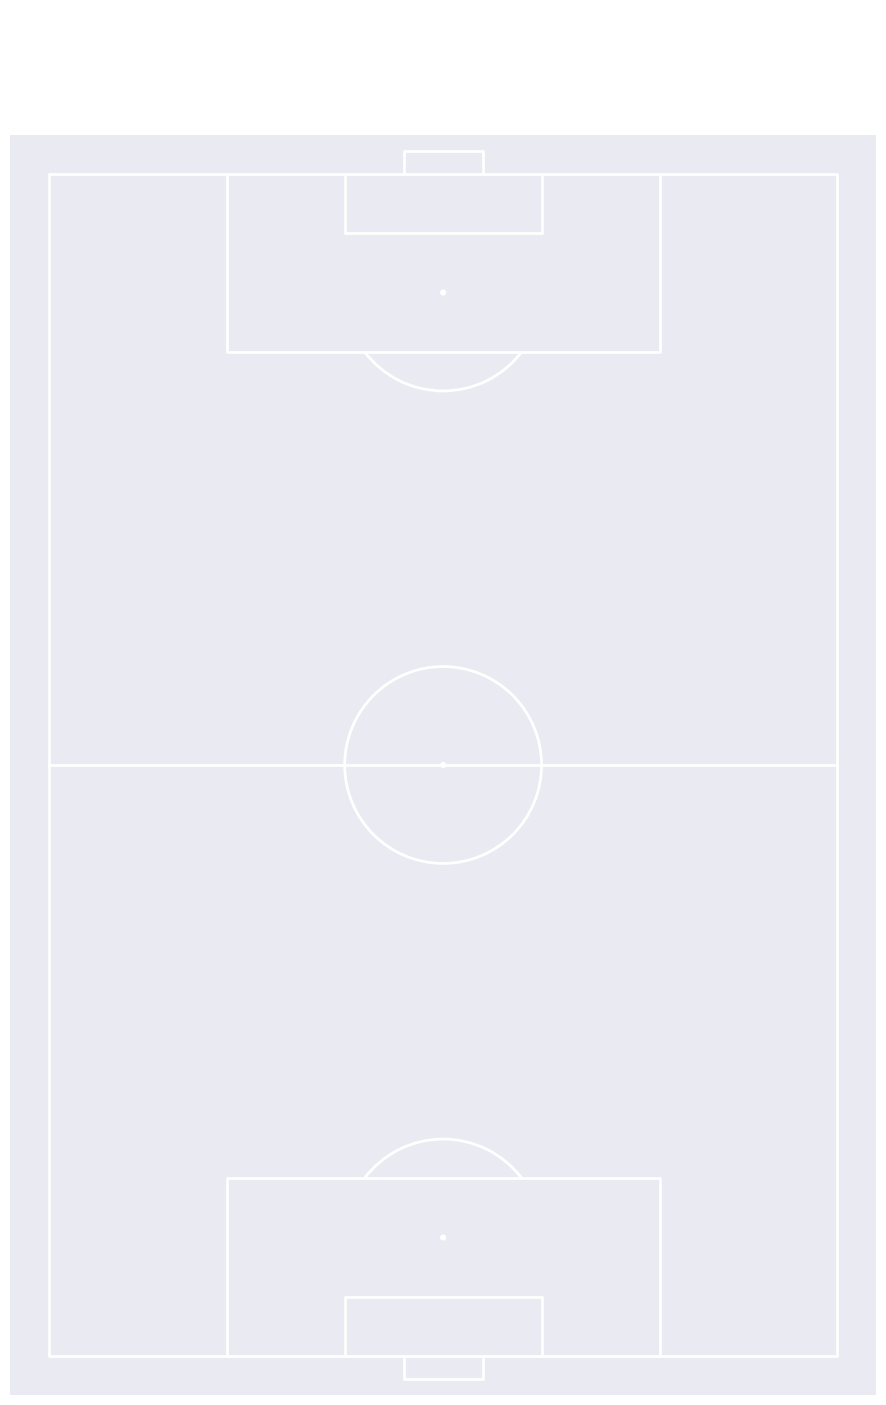

In [15]:


# Cargar los datos del partido utilizando Sbopen
parser = Sbopen()
# Reemplaza 'match_id' con el ID específico del partido de Argentina
match_id = 3869685
event, related, freeze, tactics = parser.event(match_id)

# Filtrar los datos para obtener la formación inicial de Argentina
starting_xi_event = event.loc[(event['type_name'] == 'Starting XI') &
                              (event['team_name'] == 'Argentina'), ['id', 'tactics_formation']]
starting_xi = tactics.merge(starting_xi_event, on='id')

# Filtrar los eventos de recepción de balón exitosos de los jugadores titulares
ball_receipts = event.loc[(event['type_name'] == 'Ball Receipt') &
                          (event['outcome_name'].isnull()) &
                          (event['player_id'].isin(starting_xi['player_id'])),
                          ['player_id', 'x', 'y']]

# Unir los datos de eventos con los datos de los jugadores titulares
ball_receipts = ball_receipts.merge(starting_xi, on='player_id')

# Obtener la formación táctica
formation = starting_xi['tactics_formation'].iloc[0]

# Crear el campo de juego
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14,
                      grid_width=0.9, grid_height=0.9, axis=False)

# Cargar la fuente desde una URL
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

# Añadir el título
title = axs['title'].text(0.5, 0.5, 'Recepciones de pase\nArgentina vs Francia',
                          fontsize=25, va='center', ha='center', color='#161616',
                          fontproperties=fm_rubik.prop)

# Dibujar la formación en el campo
pitch_ax = pitch.formation(formation, kind='pitch',
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           width=23,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3)

# Añadir kdeplot y nombres de jugadores
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15,
               ax=pitch_ax[position], fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=ball_receipts.loc[ball_receipts['position_id'] == position, 'x'],
                  y=ball_receipts.loc[ball_receipts['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Blues', thresh=0,
                  ax=pitch_ax[position])

plt.show()

In [15]:
# Sustituir el ID del evento con el nuevo match_id
match_id = 3869685  # ID del partido de Francia vs Argentina
events, related, freeze, tactics = parser.event(match_id)
lineup = parser.lineup(match_id)

In [16]:
# Agrega las horas de sustitución a la alineación
time_off = events.loc[(events.type_name == 'Substitution'),
                      ['player_id', 'minute']]
time_off.rename({'minute': 'off'}, axis='columns', inplace=True)
time_on = events.loc[(events.type_name == 'Substitution'),
                     ['substitution_replacement_id', 'minute']]
time_on.rename({'substitution_replacement_id': 'player_id',
                'minute': 'on'}, axis='columns', inplace=True)

players_on = time_on.player_id

In [17]:
# Fusionar las horas de sustitución
lineup = lineup.merge(time_on, on='player_id', how='left')
lineup = lineup.merge(time_off, on='player_id', how='left')

In [18]:

# Filtrar la alineación para incluir solo a los jugadores que jugaron
starting_ids = events[events.type_name == 'Starting XI'].id
starting_xi = tactics[tactics.id.isin(starting_ids)]
starting_players = starting_xi.player_id

In [19]:

# Filtrar solo a los jugadores que realmente jugaron
mask_played = ((lineup.on.notnull()) | (lineup.off.notnull()) |
               (lineup.player_id.isin(starting_players)))
lineup = lineup[mask_played].copy()

In [20]:
# Obtener la primera posición de cada jugador
player_positions = (events[['player_id', 'position_id']].dropna(how='any', axis='rows')
                    .drop_duplicates('player_id', keep='first'))
lineup = lineup.merge(player_positions, how='left', on='player_id')

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
lineup['position_abbreviation'] = lineup.position_id.map(formation_dict)

In [21]:
# Ordenar la alineación
lineup['start'] = lineup.player_id.isin(starting_players)
lineup.sort_values(['team_name', 'start', 'on', 'position_id'],
                   ascending=[True, False, True, True], inplace=True)

In [ ]:
# Filtrar eventos para el equipo de Francia
team1, team2 = lineup.team_name.unique()  # Francia (team1), Argentina (team2)
team = team1
lineup_team = lineup[lineup.team_name == team].copy()

In [ ]:
# Filtrar los pases
set_pieces = ['Throw-in', 'Free Kick', 'Corner', 'Kick Off', 'Goal Kick']
pass_receipts = events[(events.team_name == team) & (events.type_name == 'Ball Receipt')].copy()
passes_excl_throw = events[(events.team_name == team) & (events.type_name == 'Pass') &
                           (events.sub_type_name != 'Throw-in')].copy()

In [ ]:

# Obtener el número de jugadores
num_players = len(lineup_team)
num_sub = num_players - 11

# Configurar el campo
pitch = Pitch(pad_top=10, line_zorder=2)

# Configurar las flechas
green_arrow = dict(arrowstyle='simple, head_width=0.7',
                   connectionstyle="arc3,rad=-0.8", fc="green", ec="green")
red_arrow = dict(arrowstyle='simple, head_width=0.7',
                 connectionstyle="arc3,rad=-0.8", fc="red", ec="red")

In [ ]:
# Cargar los logos de los equipos
FRANCE_LOGO_URL = 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/1920px-Flag_of_France.svg.png'
ARGENTINA_LOGO_URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/1920px-Flag_of_Argentina.svg.png'

france_logo = Image.open(urlopen(FRANCE_LOGO_URL))
argentina_logo = Image.open(urlopen(ARGENTINA_LOGO_URL))

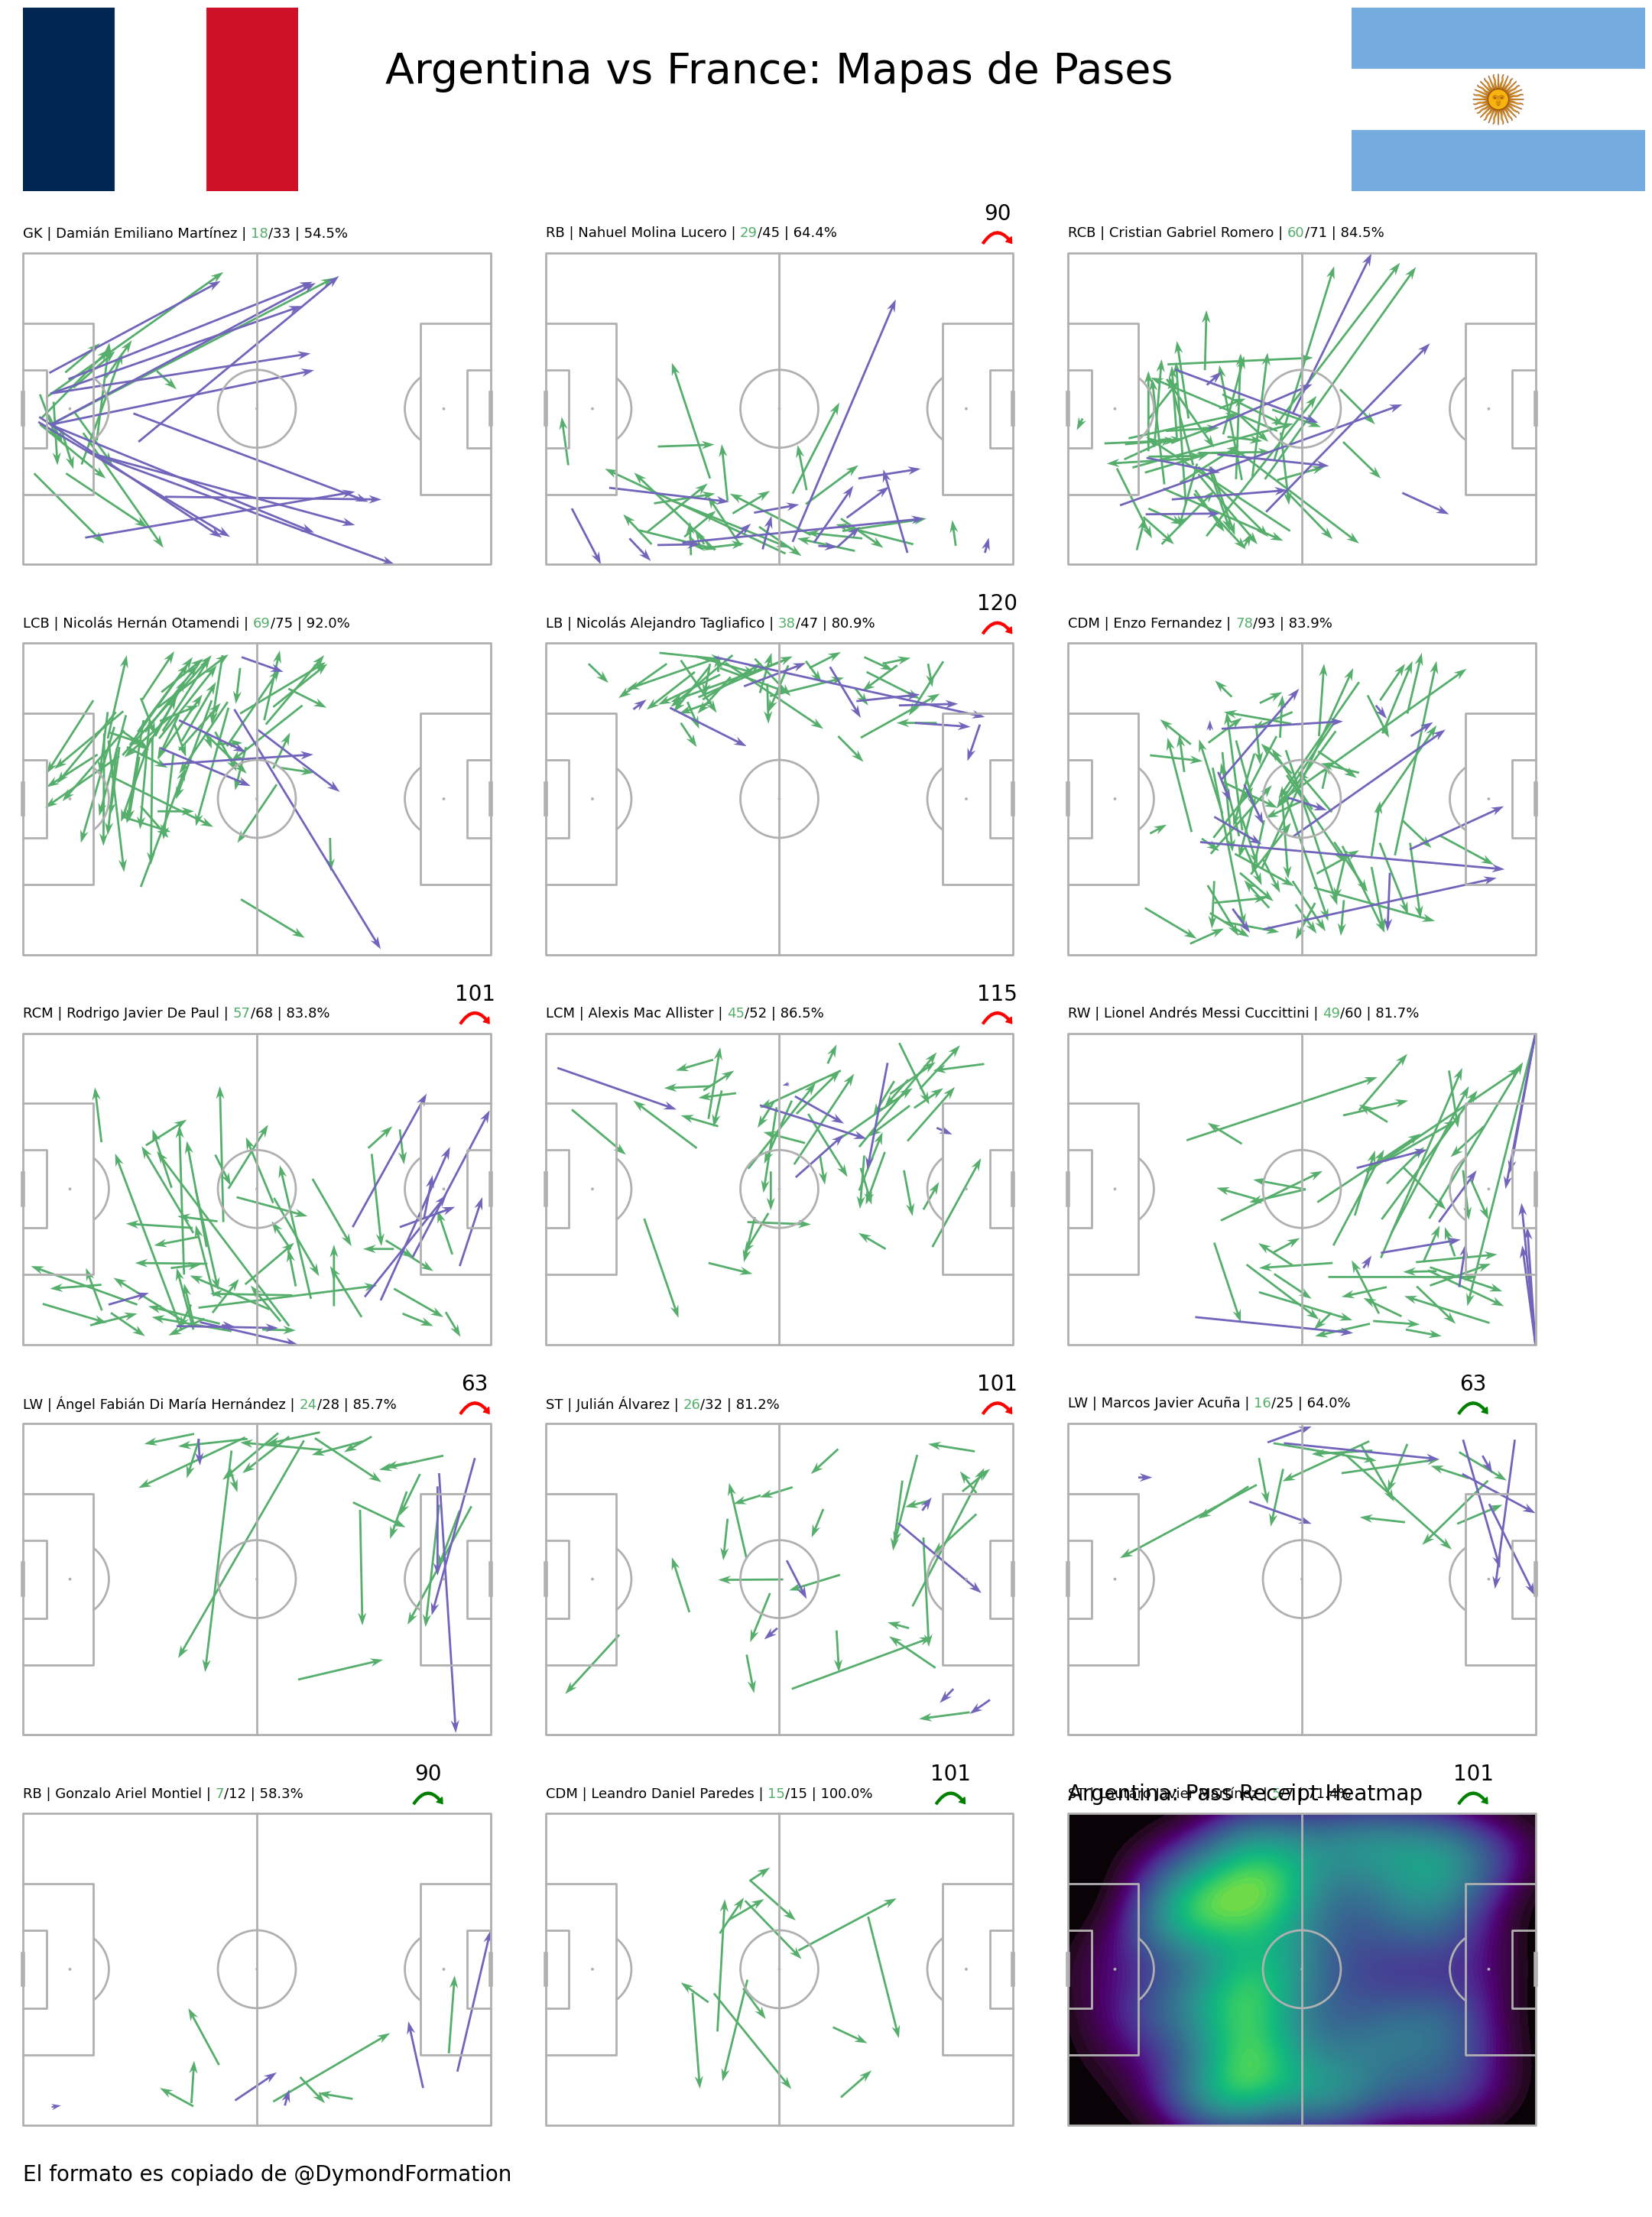

In [ ]:
# Graficar los mapas de pases
warnings.simplefilter("ignore", UserWarning)

# Crear una cuadrícula de 5x3
fig, axs = pitch.grid(nrows=5, ncols=3, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.84)

# Recorrer la cuadrícula y graficar los mapas de pases de cada jugador
for idx, ax in enumerate(axs['pitch'].flat):
    if idx < num_players:
        lineup_player = lineup_team.iloc[idx]
        player_id = lineup_player.player_id
        player_pass = passes_excl_throw[passes_excl_throw.player_id == player_id]
        complete_pass = player_pass[player_pass.outcome_name.isnull()]
        incomplete_pass = player_pass[player_pass.outcome_name.notnull()]

        # Graficar las flechas
        pitch.arrows(complete_pass.x, complete_pass.y,
                     complete_pass.end_x, complete_pass.end_y,
                     color='#56ae6c', width=2, headwidth=4, headlength=6, ax=ax)
        pitch.arrows(incomplete_pass.x, incomplete_pass.y,
                     incomplete_pass.end_x, incomplete_pass.end_y,
                     color='#7065bb', width=2, headwidth=4, headlength=6, ax=ax)

        # Agregar el título de cada jugador
        total_pass = len(complete_pass) + len(incomplete_pass)
        annotation_string = (f'{lineup_player.position_abbreviation} | '
                             f'{lineup_player.player_name} | '
                             f'<{len(complete_pass)}>/{total_pass} | '
                             f'{round(100 * len(complete_pass)/total_pass, 1)}%')
        ax_text(0, -5, annotation_string, ha='left', va='center', fontsize=13,
                highlight_textprops=[{"color": '#56ae6c'}], ax=ax)

        # Agregar información de sustituciones
        if not np.isnan(lineup_team.iloc[idx].off):
            ax.text(116, -10, str(lineup_team.iloc[idx].off.astype(int)), fontsize=20,
                    ha='center', va='center')
            ax.annotate('', (120, -2), (112, -2), arrowprops=red_arrow)
        if not np.isnan(lineup_team.iloc[idx].on):
            ax.text(104, -10, str(lineup_team.iloc[idx].on.astype(int)), fontsize=20,
                    ha='center', va='center')
            ax.annotate('', (108, -2), (100, -2), arrowprops=green_arrow)

# Graficar el mapa de calor de pases para el último mapa de pases
pitch.kdeplot(x=pass_receipts.x, y=pass_receipts.y, ax=ax,
              cmap=cmr.lavender,
              levels=100,
              thresh=0, fill=True)
ax.text(0, -5, f'{team}: Pass Receipt Heatmap', ha='left', va='center',
        fontsize=20)

# Eliminar ejes no utilizados
for ax in axs['pitch'].flat[11 + num_sub:-1]:
    ax.remove()

# Texto de la nota final
axs['endnote'].text(0, 0.5, 'El formato es copiado de @DymondFormation',
                    fontsize=20, va='center', ha='left')

# Agregar logos
ax_france_logo = add_image(france_logo, fig,
                           left=axs['title'].get_position().x0,
                           bottom=axs['title'].get_position().y0,
                           height=axs['title'].get_position().height)

ax_argentina_logo = add_image(argentina_logo, fig, left=0.8521,
                               bottom=axs['title'].get_position().y0,
                               height=axs['title'].get_position().height)

# Título del gráfico
axs['title'].text(0.5, 0.65, f'{team1} vs {team2}: Mapas de Pases', fontsize=40,
                  va='center', ha='center')

# Mostrar el gráfico
plt.show()

**Francia**

<img src="https://digitalhub.fifa.com/transform/c7f48633-fd9c-421f-9333-eb091365ee93/France-v-Jamaica-Group-F-FIFA-Women-s-World-Cup-Australia-New-Zealand-2023?&io=transform:fill,height:910,width:1536&quality=75" width=500>

In [ ]:
player_short_names = {
    'Hugo Lloris': 'Hugo Lloris',
    'Benjamin Pavard': 'B. Pavard',
    'Raphaël Varane': 'Varane',
    'Ibrahima Konaté': 'Konaté',
    'Theo Hernández': 'Theo Hernández',
    'Adrien Rabiot': 'Rabiot',
    'Aurélien Tchouaméni': 'Tchouaméni',
    'Kylian Mbappé': 'Mbappé',
    'Antoine Griezmann': 'Griezmann',
    'Olivier Giroud': 'Giroud',
    'Kingsley Coman': 'K. Coman'
}



In [ ]:
image_urls = {
    'Hugo Lloris': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3d/2020-03-10_Fu%C3%9Fball%2C_M%C3%A4nner%2C_UEFA_Champions_League_Achtelfinale%2C_RB_Leipzig_-_Tottenham_Hotspur_1DX_3687_by_Stepro.jpg/1024px-2020-03-10_Fu%C3%9Fball%2C_M%C3%A4nner%2C_UEFA_Champions_League_Achtelfinale%2C_RB_Leipzig_-_Tottenham_Hotspur_1DX_3687_by_Stepro.jpg',
    'Benjamin Pavard': 'https://upload.wikimedia.org/wikipedia/commons/5/5a/Benjamin_Pavard_20180709.jpg',
    'Raphaël Varane': 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Rapha%C3%ABl_Varane_2018.jpg/220px-Rapha%C3%ABl_Varane_2018.jpg',
    'Ibrahima Konaté': 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Liverpool_FC_gegen_1._FSV_Mainz_05_%28Testspiel_23._Juli_2021%29_15_%28cropped%29.jpg/800px-Liverpool_FC_gegen_1._FSV_Mainz_05_%28Testspiel_23._Juli_2021%29_15_%28cropped%29.jpg',
    'Theo Hernández': 'https://upload.wikimedia.org/wikipedia/commons/6/66/TheoHernandez2022Salzburg.jpg',
    'Aurélien Tchouaméni': 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Aur%C3%A9lien_Tchouam%C3%A9ni.jpg/220px-Aur%C3%A9lien_Tchouam%C3%A9ni.jpg',
    'Adrien Rabiot': 'https://upload.wikimedia.org/wikipedia/commons/1/11/Rus-Fra_2018_%283%29_%28cropped%29.jpg',
    'Kylian Mbappé': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Mbappe_before_Real_Madrid_vs_Alaves_3_-_2_Matchday_7_La_Liga_2024.jpg/220px-Mbappe_before_Real_Madrid_vs_Alaves_3_-_2_Matchday_7_La_Liga_2024.jpg',
    'Olivier Giroud': 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Olivier_Giroud.jpg/310px-Olivier_Giroud.jpg',
    'Antoine Griezmann': 'https://upload.wikimedia.org/wikipedia/commons/2/29/Antoine_Griezmann_World_Cup_Trophy.jpg',
    'Kingsley Coman': 'https://upload.wikimedia.org/wikipedia/commons/e/ef/Kingsley_Coman_%282019%29_%28cropped%29.jpg'
}



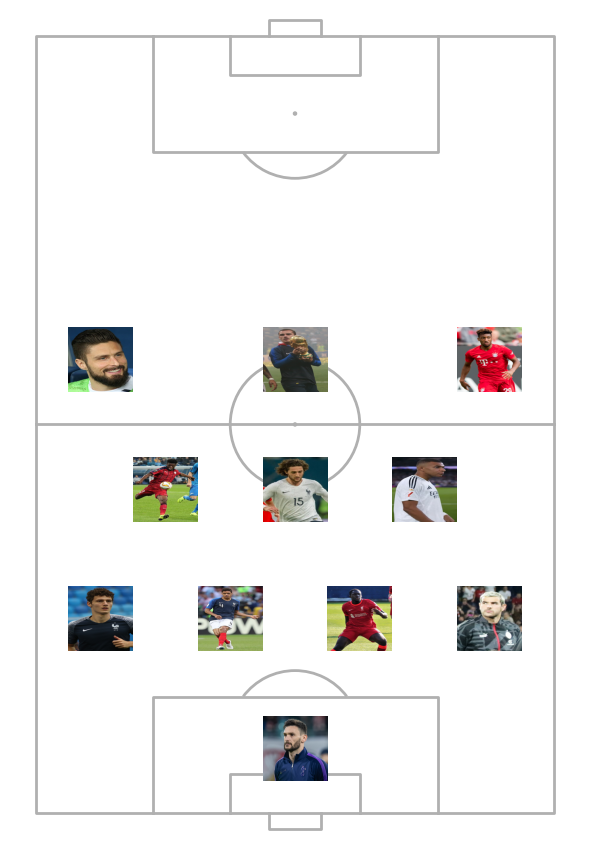

In [ ]:
# Cargar imágenes
images = [Image.open(urlopen(url)) for url in image_urls.values()]

# Crear el campo de juego
pitch = VerticalPitch(goal_type='box')
fig, ax = pitch.draw(figsize=(6, 8.72))

# Coordenadas de la formación 4-3-3
positions = [
    (40, 10),  # Portero
    (10, 30), (30, 30), (50, 30), (70, 30),  # Defensores
    (20, 50), (40, 50), (60, 50),  # Centrocampistas
    (10, 70), (40, 70), (70, 70)  # Delanteros
]

# Graficar solo las imágenes en sus posiciones
for (x, y), image in zip(positions, images):
    ax.imshow(image, extent=[x-5, x+5, y-5, y+5], zorder=2)

plt.show()

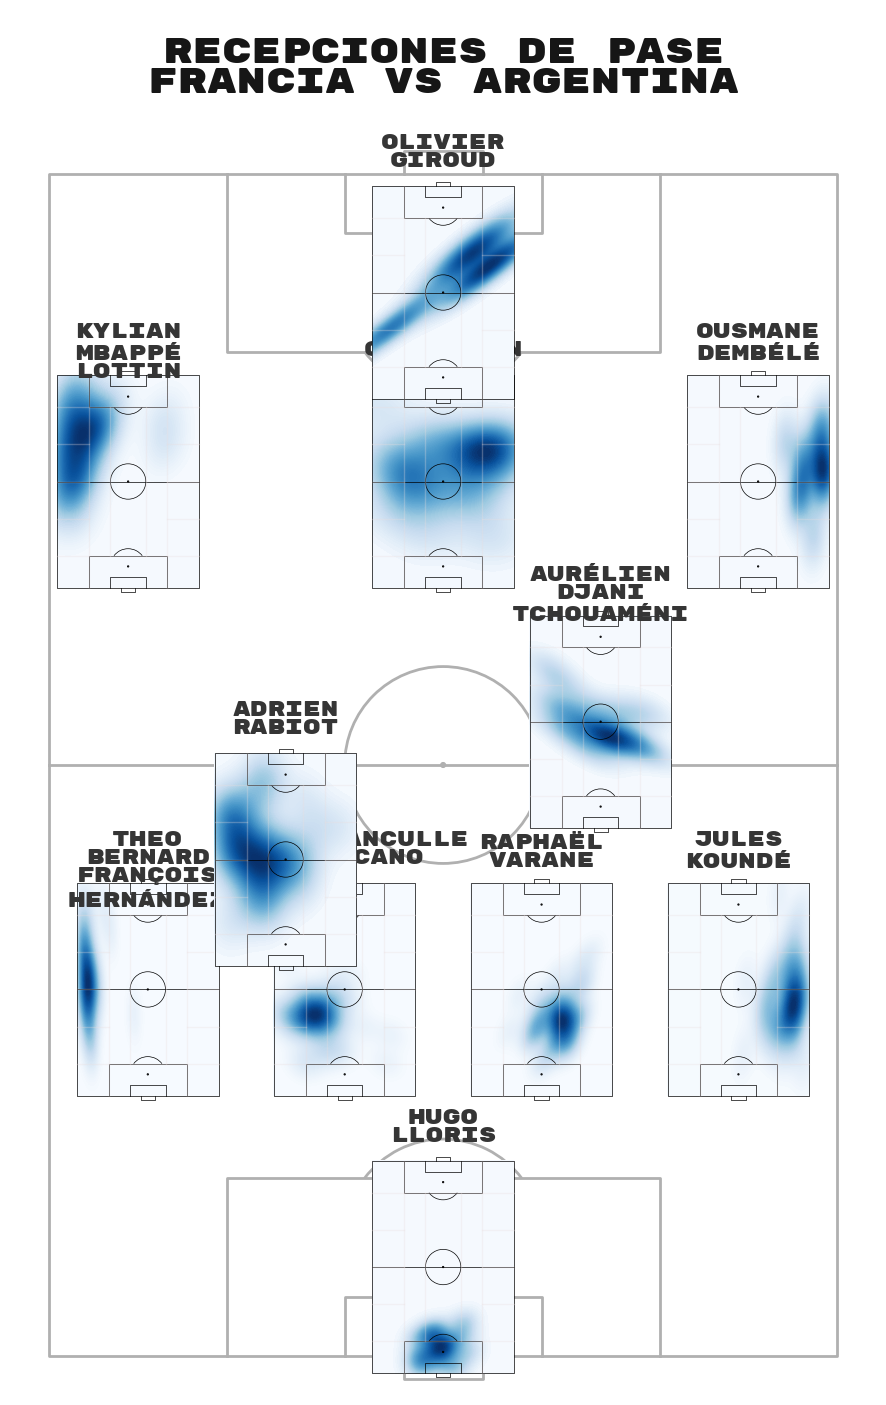

In [ ]:
# Cargar los datos del partido utilizando Sbopen
parser = Sbopen()
# Reemplaza 'match_id' con el ID específico del partido de Francia
match_id = 3869685
event, related, freeze, tactics = parser.event(match_id)

# Filtrar los datos para obtener la formación inicial de Francia
starting_xi_event = event.loc[(event['type_name'] == 'Starting XI') &
                              (event['team_name'] == 'France'), ['id', 'tactics_formation']]
starting_xi = tactics.merge(starting_xi_event, on='id')

# Filtrar los eventos de recepción de balón exitosos de los jugadores titulares
ball_receipts = event.loc[(event['type_name'] == 'Ball Receipt') &
                          (event['outcome_name'].isnull()) &
                          (event['player_id'].isin(starting_xi['player_id'])),
                          ['player_id', 'x', 'y']]

# Unir los datos de eventos con los datos de los jugadores titulares
ball_receipts = ball_receipts.merge(starting_xi, on='player_id')

# Obtener la formación táctica
formation = starting_xi['tactics_formation'].iloc[0]

# Crear el campo de juego
pitch = VerticalPitch(goal_type='box')
fig, axs = pitch.grid(endnote_height=0, title_height=0.08, figheight=14,
                      grid_width=0.9, grid_height=0.9, axis=False)

# Cargar la fuente desde una URL
fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/'
                       'rubikmonoone/RubikMonoOne-Regular.ttf')

# Añadir el título
title = axs['title'].text(0.5, 0.5, 'Recepciones de pase\nFrancia vs Argentina',
                          fontsize=25, va='center', ha='center', color='#161616',
                          fontproperties=fm_rubik.prop)

# Dibujar la formación en el campo
pitch_ax = pitch.formation(formation, kind='pitch',
                           xoffset=[-3, 6, 6, 6, 6, 14, 0, 0, 0, 0, 0],
                           width=23,
                           positions=starting_xi['position_id'],
                           ax=axs['pitch'],
                           linewidth=0.5,
                           pitch_color='None',
                           line_zorder=3,
                           line_color='black',
                           positional=True,
                           positional_zorder=3,
                           positional_linewidth=1,
                           positional_alpha=0.3)

# Añadir kdeplot y nombres de jugadores
for position in pitch_ax:
    player_name = starting_xi[starting_xi['position_id'] == position].player_name.iloc[0]
    player_name = player_name.replace(' ', '\n').replace('-', '-\n')
    pitch.text(150, 40, player_name, va='top', ha='center', fontsize=15,
               ax=pitch_ax[position], fontproperties=fm_rubik.prop, color='#353535')
    pitch.kdeplot(x=ball_receipts.loc[ball_receipts['position_id'] == position, 'x'],
                  y=ball_receipts.loc[ball_receipts['position_id'] == position, 'y'],
                  fill=True, levels=100, cut=100, cmap='Blues', thresh=0,
                  ax=pitch_ax[position])

plt.show()


In [ ]:
# Sustituir el ID del evento con el nuevo match_id
match_id = 3869685  # ID del partido de Francia vs Argentina
events, related, freeze, tactics = parser.event(match_id)
lineup = parser.lineup(match_id)

In [ ]:
# Agrega las horas de sustitución a la alineación
time_off = events.loc[(events.type_name == 'Substitution'),
                      ['player_id', 'minute']]
time_off.rename({'minute': 'off'}, axis='columns', inplace=True)
time_on = events.loc[(events.type_name == 'Substitution'),
                     ['substitution_replacement_id', 'minute']]
time_on.rename({'substitution_replacement_id': 'player_id',
                'minute': 'on'}, axis='columns', inplace=True)

players_on = time_on.player_id

In [ ]:
# Fusionar las horas de sustitución
lineup = lineup.merge(time_on, on='player_id', how='left')
lineup = lineup.merge(time_off, on='player_id', how='left')

In [ ]:

# Filtrar la alineación para incluir solo a los jugadores que jugaron
starting_ids = events[events.type_name == 'Starting XI'].id
starting_xi = tactics[tactics.id.isin(starting_ids)]
starting_players = starting_xi.player_id

In [ ]:
# Filtrar solo a los jugadores que realmente jugaron
mask_played = ((lineup.on.notnull()) | (lineup.off.notnull()) |
               (lineup.player_id.isin(starting_players)))
lineup = lineup[mask_played].copy()

In [ ]:
# Obtener la primera posición de cada jugador
player_positions = (events[['player_id', 'position_id']].dropna(how='any', axis='rows')
                    .drop_duplicates('player_id', keep='first'))
lineup = lineup.merge(player_positions, how='left', on='player_id')

formation_dict = {1: 'GK', 2: 'RB', 3: 'RCB', 4: 'CB', 5: 'LCB', 6: 'LB', 7: 'RWB',
                  8: 'LWB', 9: 'RDM', 10: 'CDM', 11: 'LDM', 12: 'RM', 13: 'RCM',
                  14: 'CM', 15: 'LCM', 16: 'LM', 17: 'RW', 18: 'RAM', 19: 'CAM',
                  20: 'LAM', 21: 'LW', 22: 'RCF', 23: 'ST', 24: 'LCF', 25: 'SS'}
lineup['position_abbreviation'] = lineup.position_id.map(formation_dict)

In [ ]:
# Ordenar la alineación
lineup['start'] = lineup.player_id.isin(starting_players)
lineup.sort_values(['team_name', 'start', 'on', 'position_id'],
                   ascending=[True, False, True, True], inplace=True)

In [ ]:
# Filtrar eventos para el equipo de Francia
team1, team2 = lineup.team_name.unique()  # Francia (team1), Argentina (team2)
team = team2
lineup_team = lineup[lineup.team_name == team].copy()

In [ ]:
# Filtrar los pases
set_pieces = ['Throw-in', 'Free Kick', 'Corner', 'Kick Off', 'Goal Kick']
pass_receipts = events[(events.team_name == team) & (events.type_name == 'Ball Receipt')].copy()
passes_excl_throw = events[(events.team_name == team) & (events.type_name == 'Pass') &
                           (events.sub_type_name != 'Throw-in')].copy()

In [ ]:
# Obtener el número de jugadores
num_players = len(lineup_team)
num_sub = num_players - 11

# Configurar el campo
pitch = Pitch(pad_top=10, line_zorder=2)

# Configurar las flechas
green_arrow = dict(arrowstyle='simple, head_width=0.7',
                   connectionstyle="arc3,rad=-0.8", fc="green", ec="green")
red_arrow = dict(arrowstyle='simple, head_width=0.7',
                 connectionstyle="arc3,rad=-0.8", fc="red", ec="red")

In [ ]:
# Cargar los logos de los equipos
FRANCE_LOGO_URL = 'https://upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/1920px-Flag_of_France.svg.png'
ARGENTINA_LOGO_URL = 'https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/1920px-Flag_of_Argentina.svg.png'

france_logo = Image.open(urlopen(FRANCE_LOGO_URL))
argentina_logo = Image.open(urlopen(ARGENTINA_LOGO_URL))

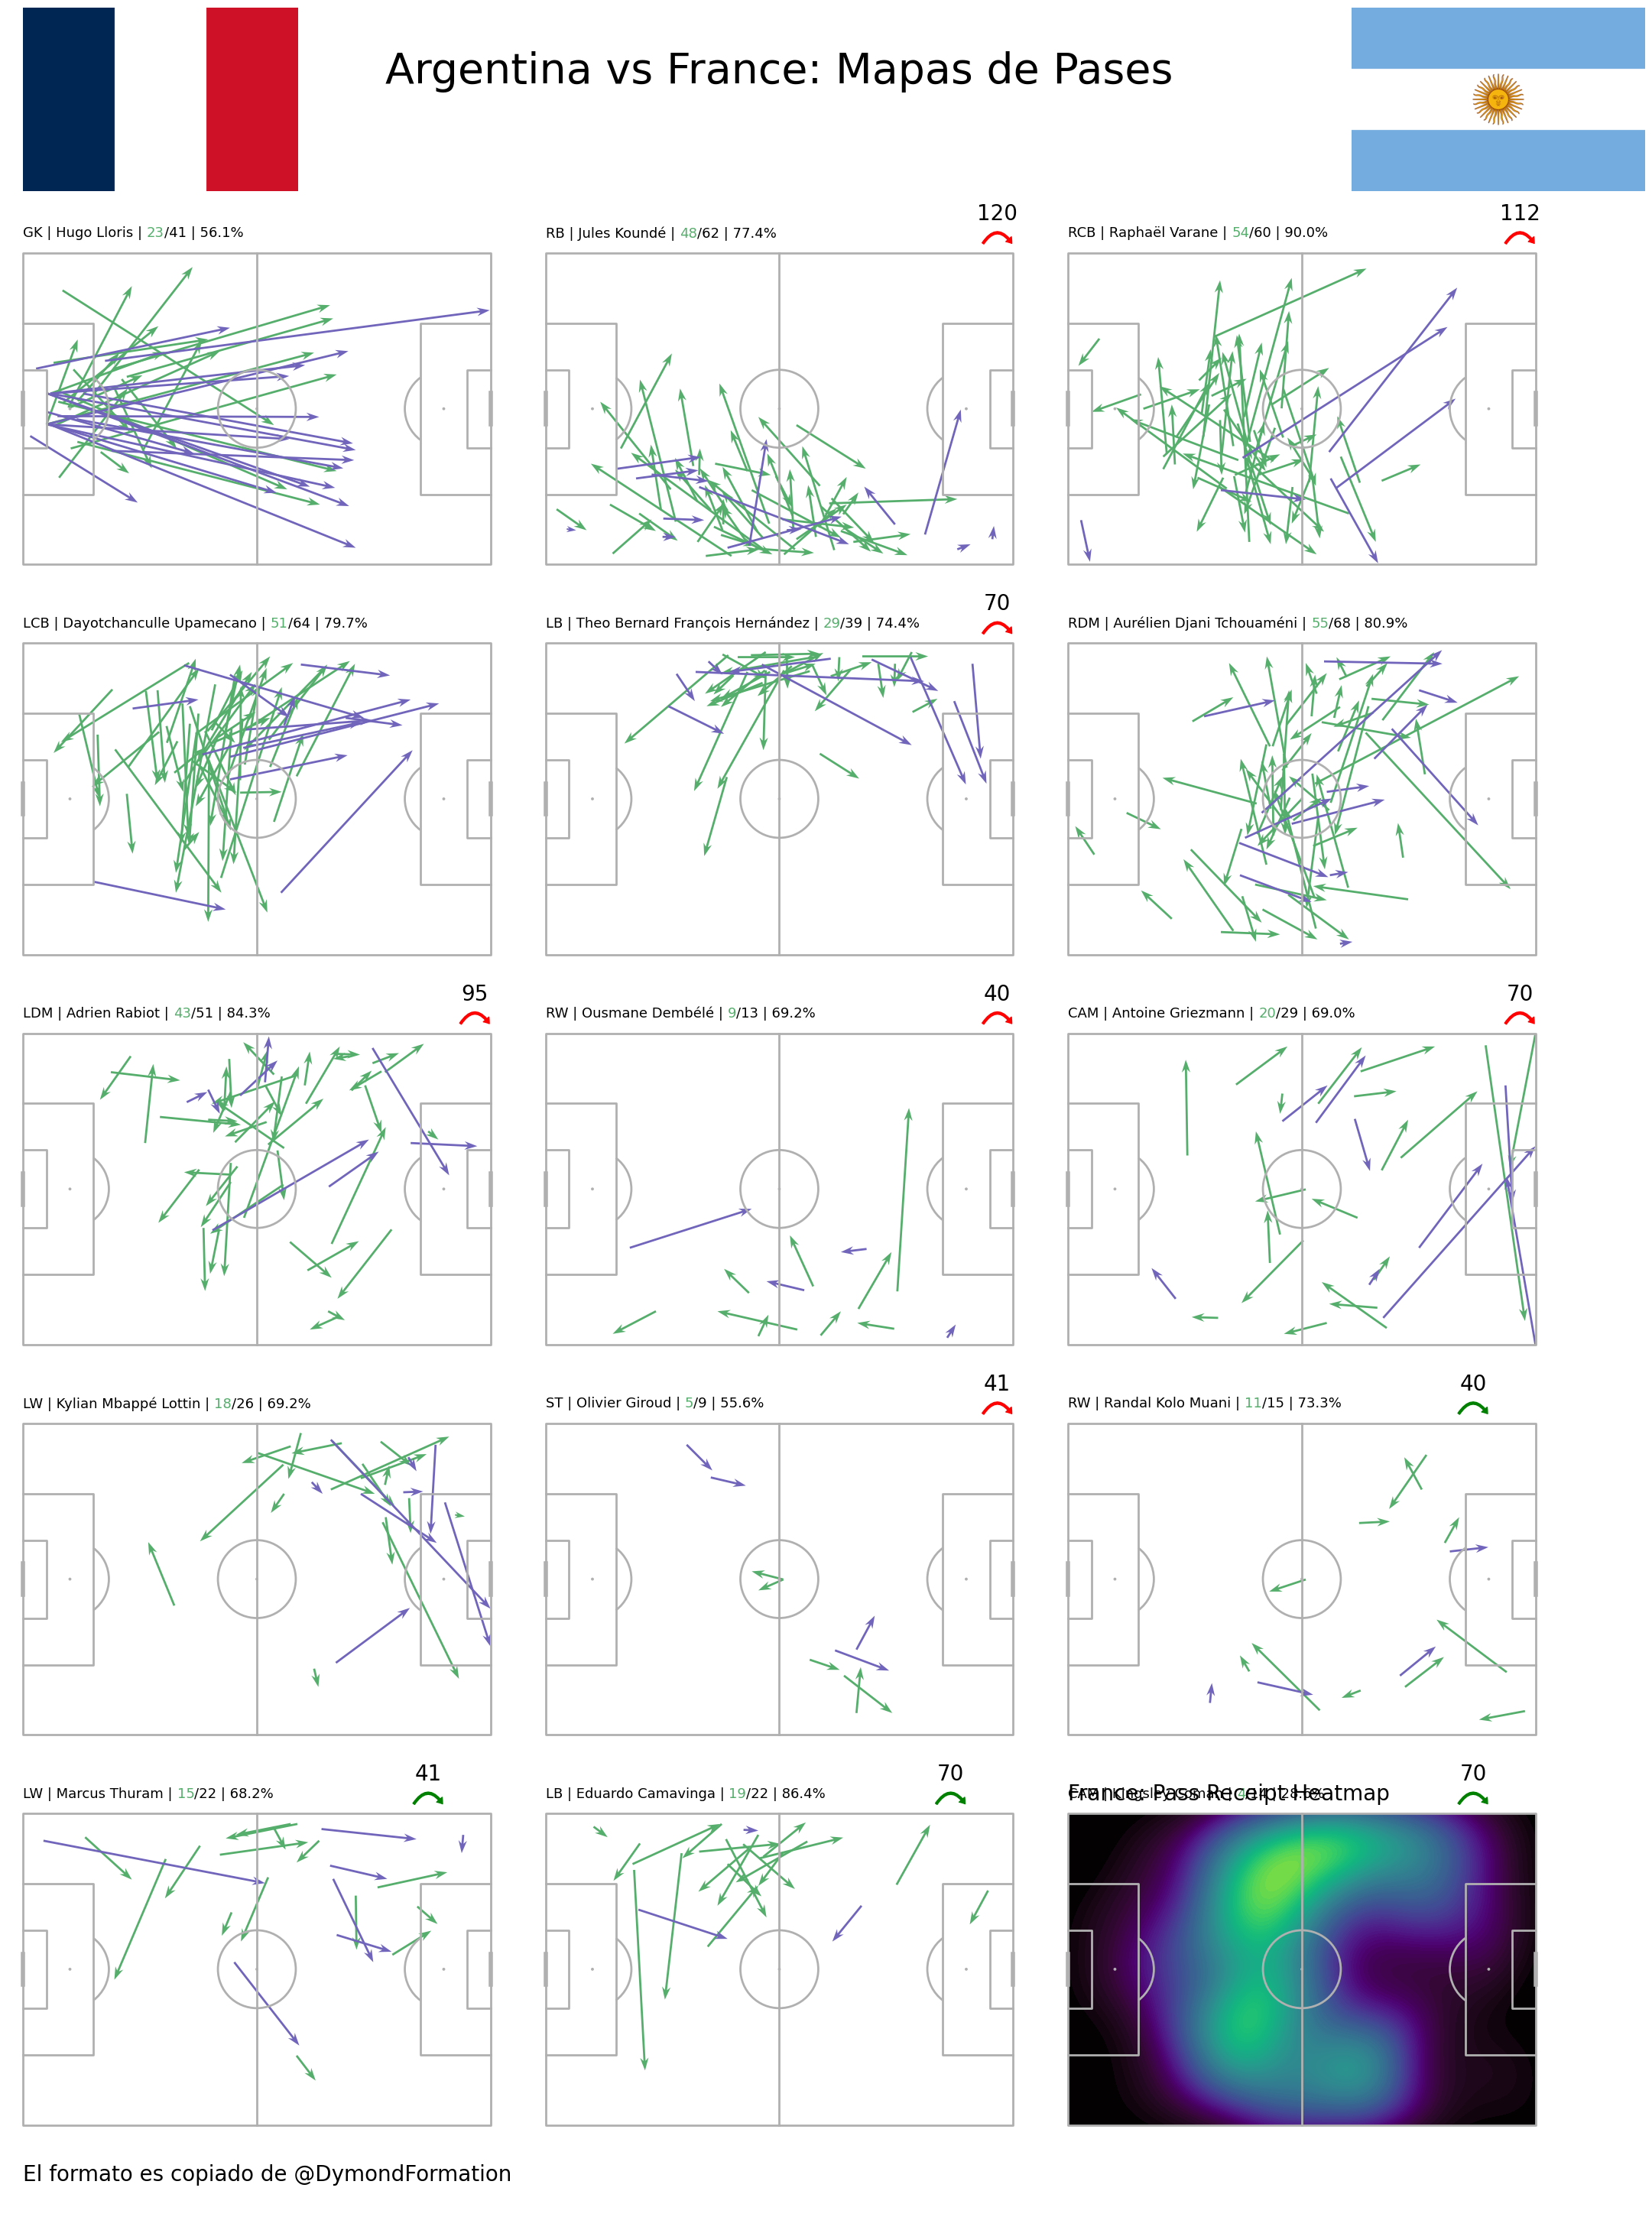

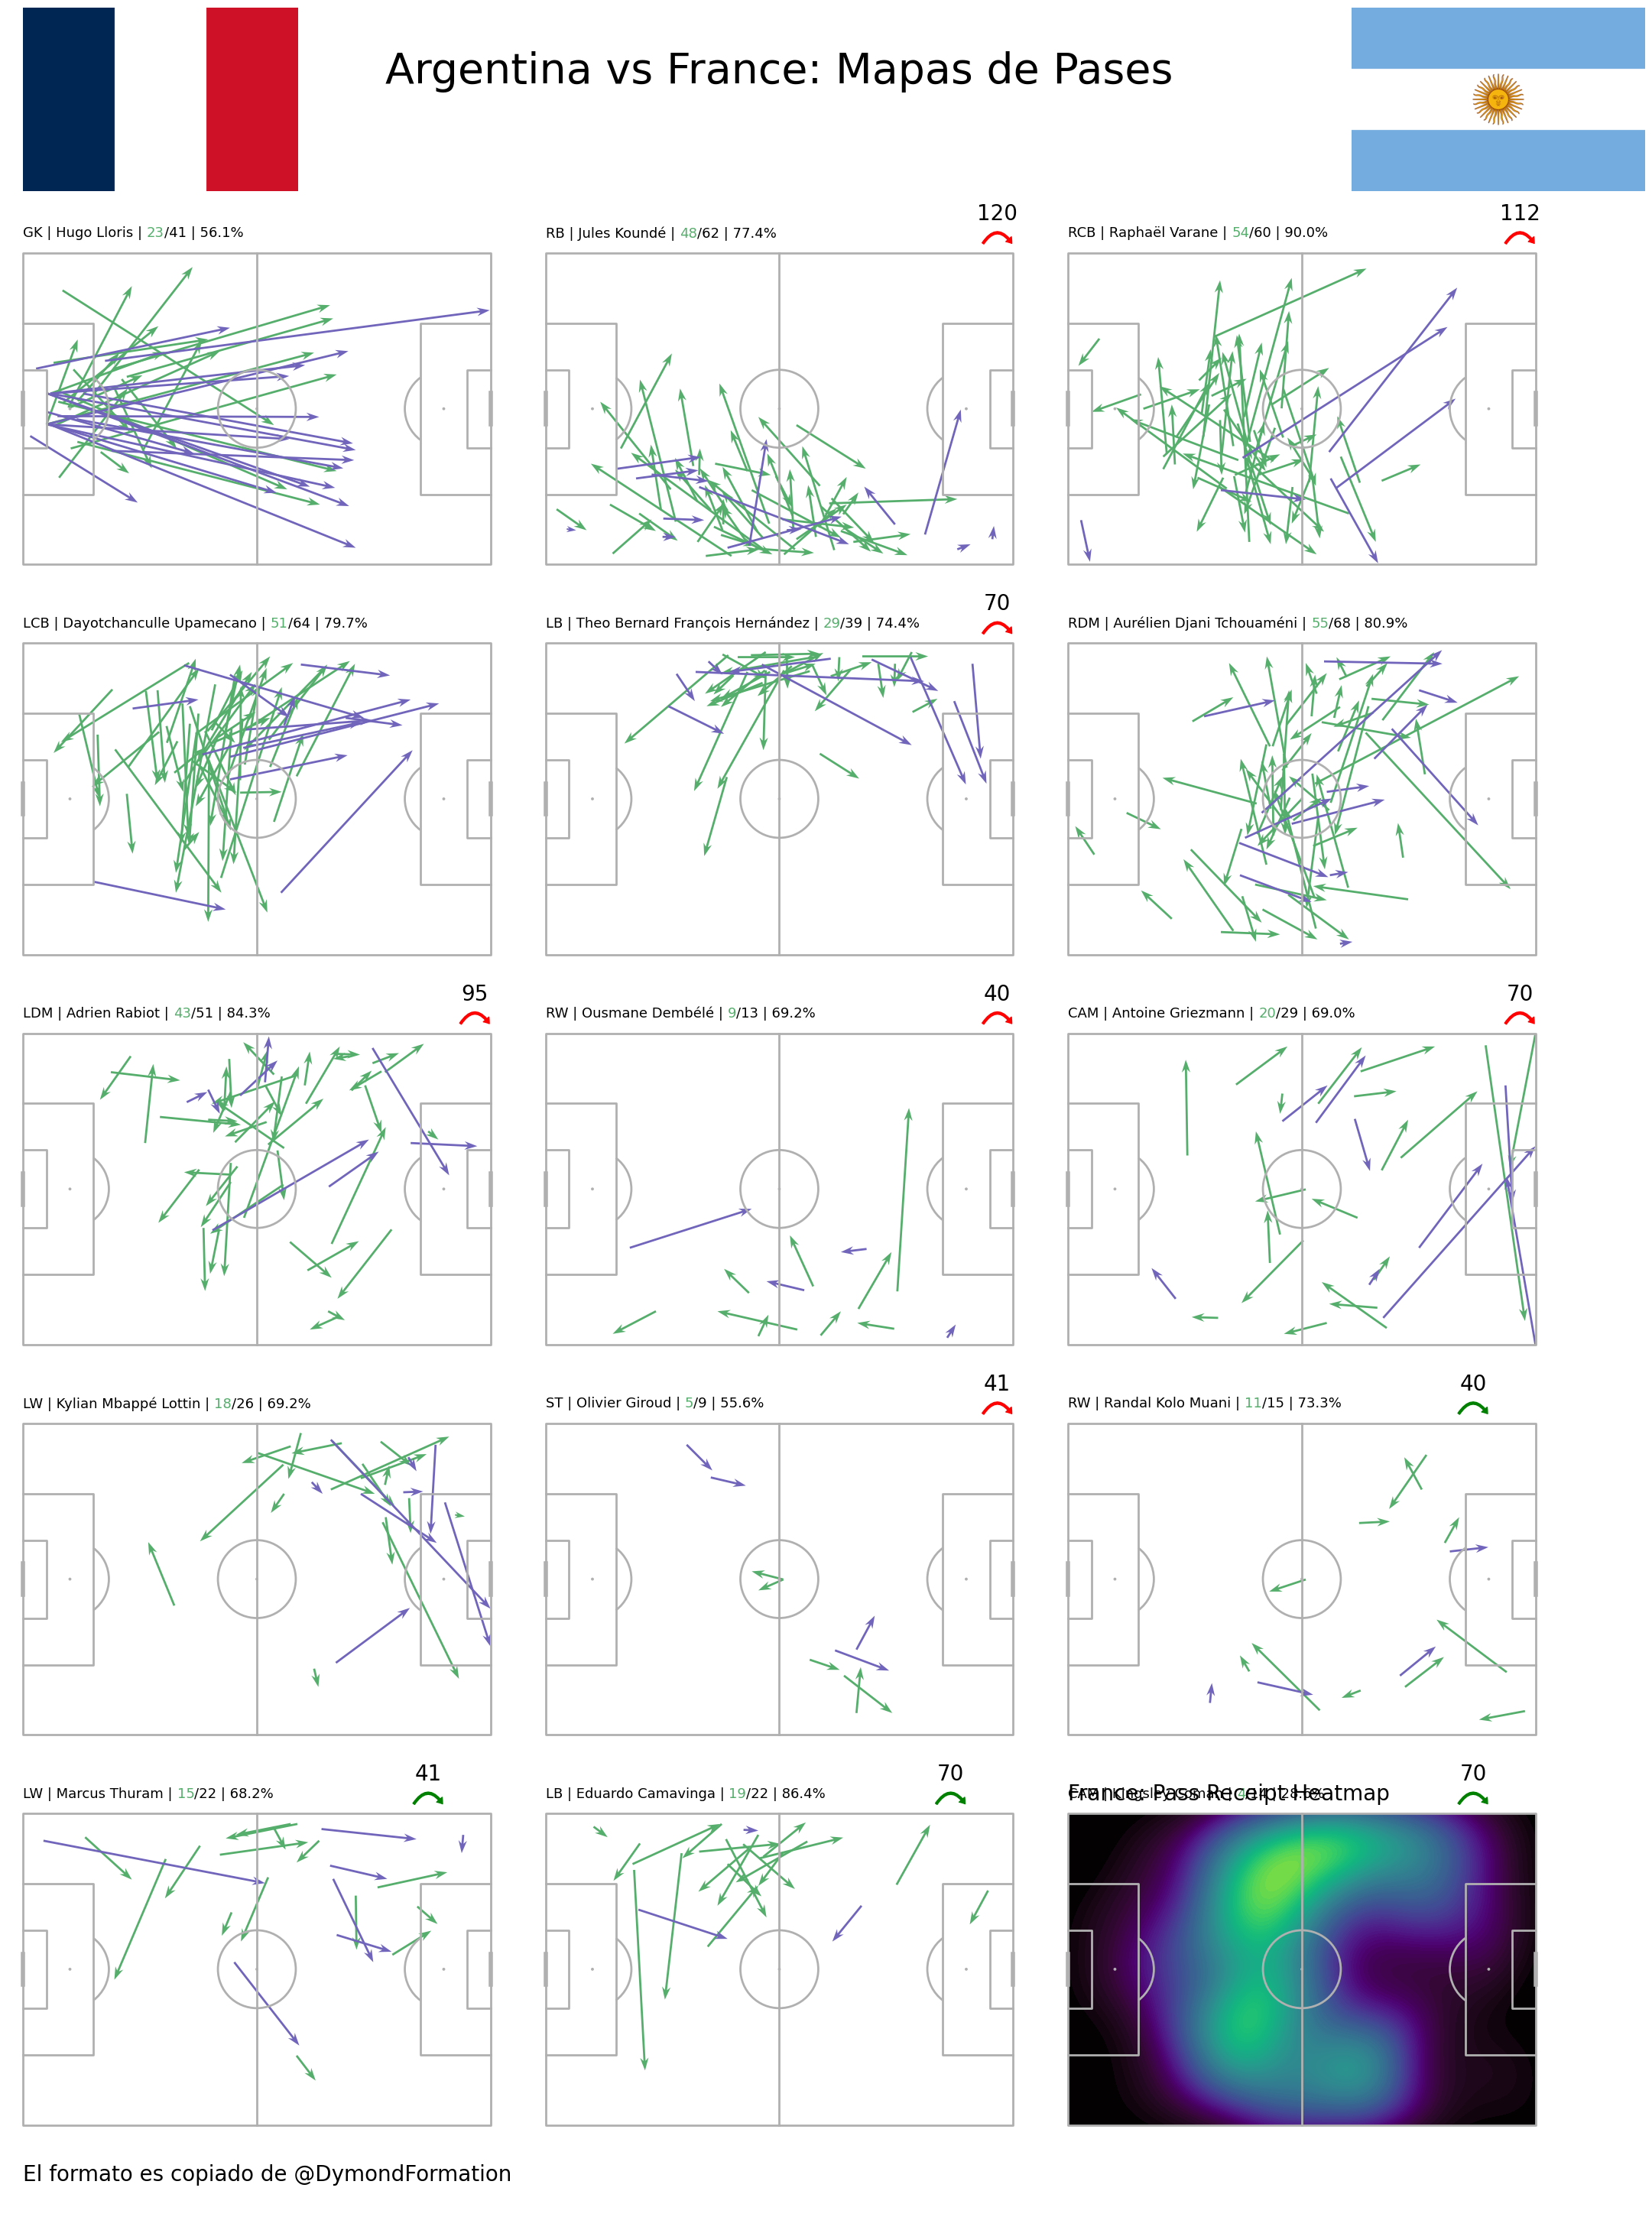

In [ ]:
# Graficar los mapas de pases
warnings.simplefilter("ignore", UserWarning)

# Crear una cuadrícula de 5x3
fig, axs = pitch.grid(nrows=5, ncols=3, figheight=30,
                      endnote_height=0.03, endnote_space=0,
                      axis=False,
                      title_height=0.08, grid_height=0.84)

# Recorrer la cuadrícula y graficar los mapas de pases de cada jugador
for idx, ax in enumerate(axs['pitch'].flat):
    if idx < num_players:
        lineup_player = lineup_team.iloc[idx]
        player_id = lineup_player.player_id
        player_pass = passes_excl_throw[passes_excl_throw.player_id == player_id]
        complete_pass = player_pass[player_pass.outcome_name.isnull()]
        incomplete_pass = player_pass[player_pass.outcome_name.notnull()]

        # Graficar las flechas
        pitch.arrows(complete_pass.x, complete_pass.y,
                     complete_pass.end_x, complete_pass.end_y,
                     color='#56ae6c', width=2, headwidth=4, headlength=6, ax=ax)
        pitch.arrows(incomplete_pass.x, incomplete_pass.y,
                     incomplete_pass.end_x, incomplete_pass.end_y,
                     color='#7065bb', width=2, headwidth=4, headlength=6, ax=ax)

        # Agregar el título de cada jugador
        total_pass = len(complete_pass) + len(incomplete_pass)
        annotation_string = (f'{lineup_player.position_abbreviation} | '
                             f'{lineup_player.player_name} | '
                             f'<{len(complete_pass)}>/{total_pass} | '
                             f'{round(100 * len(complete_pass)/total_pass, 1)}%')
        ax_text(0, -5, annotation_string, ha='left', va='center', fontsize=13,
                highlight_textprops=[{"color": '#56ae6c'}], ax=ax)

        # Agregar información de sustituciones
        if not np.isnan(lineup_team.iloc[idx].off):
            ax.text(116, -10, str(lineup_team.iloc[idx].off.astype(int)), fontsize=20,
                    ha='center', va='center')
            ax.annotate('', (120, -2), (112, -2), arrowprops=red_arrow)
        if not np.isnan(lineup_team.iloc[idx].on):
            ax.text(104, -10, str(lineup_team.iloc[idx].on.astype(int)), fontsize=20,
                    ha='center', va='center')
            ax.annotate('', (108, -2), (100, -2), arrowprops=green_arrow)

# Graficar el mapa de calor de pases para el último mapa de pases
pitch.kdeplot(x=pass_receipts.x, y=pass_receipts.y, ax=ax,
              cmap=cmr.lavender,
              levels=100,
              thresh=0, fill=True)
ax.text(0, -5, f'{team}: Pass Receipt Heatmap', ha='left', va='center',
        fontsize=20)

# Eliminar ejes no utilizados
for ax in axs['pitch'].flat[11 + num_sub:-1]:
    ax.remove()

# Texto de la nota final
axs['endnote'].text(0, 0.5, 'El formato es copiado de @DymondFormation',
                    fontsize=20, va='center', ha='left')

# Agregar logos
ax_france_logo = add_image(france_logo, fig,
                           left=axs['title'].get_position().x0,
                           bottom=axs['title'].get_position().y0,
                           height=axs['title'].get_position().height)

ax_argentina_logo = add_image(argentina_logo, fig, left=0.8521,
                               bottom=axs['title'].get_position().y0,
                               height=axs['title'].get_position().height)

# Título del gráfico
axs['title'].text(0.5, 0.65, f'{team1} vs {team2}: Mapas de Pases', fontsize=40,
                  va='center', ha='center')

# Mostrar el gráfico
plt.show()

**Messi y Mbappe**

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg/220px-Lionel-Messi-Argentina-2022-FIFA-World-Cup_%28cropped%29.jpg" width=200>,

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Mbappe_before_Real_Madrid_vs_Alaves_3_-_2_Matchday_7_La_Liga_2024.jpg/220px-Mbappe_before_Real_Madrid_vs_Alaves_3_-_2_Matchday_7_La_Liga_2024.jpg" width=200>

**Messi**

In [ ]:
messi = partido[partido['player'] == 'Lionel Andrés Messi Cuccittini']

In [ ]:
messi[['x', 'y']] = messi['location'].apply(pd.Series)

<ipython-input-114-4393c5336bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi[['x', 'y']] = messi['location'].apply(pd.Series)
<ipython-input-114-4393c5336bb2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messi[['x', 'y']] = messi['location'].apply(pd.Series)


In [ ]:
messi.location

36       [76.6, 35.7]
39       [99.3, 57.3]
52       [67.9, 59.0]
62       [81.8, 65.2]
103      [39.2, 48.1]
            ...      
4321     [96.1, 45.1]
4357              NaN
4363              NaN
4364              NaN
4365    [113.0, 73.3]
Name: location, Length: 242, dtype: object

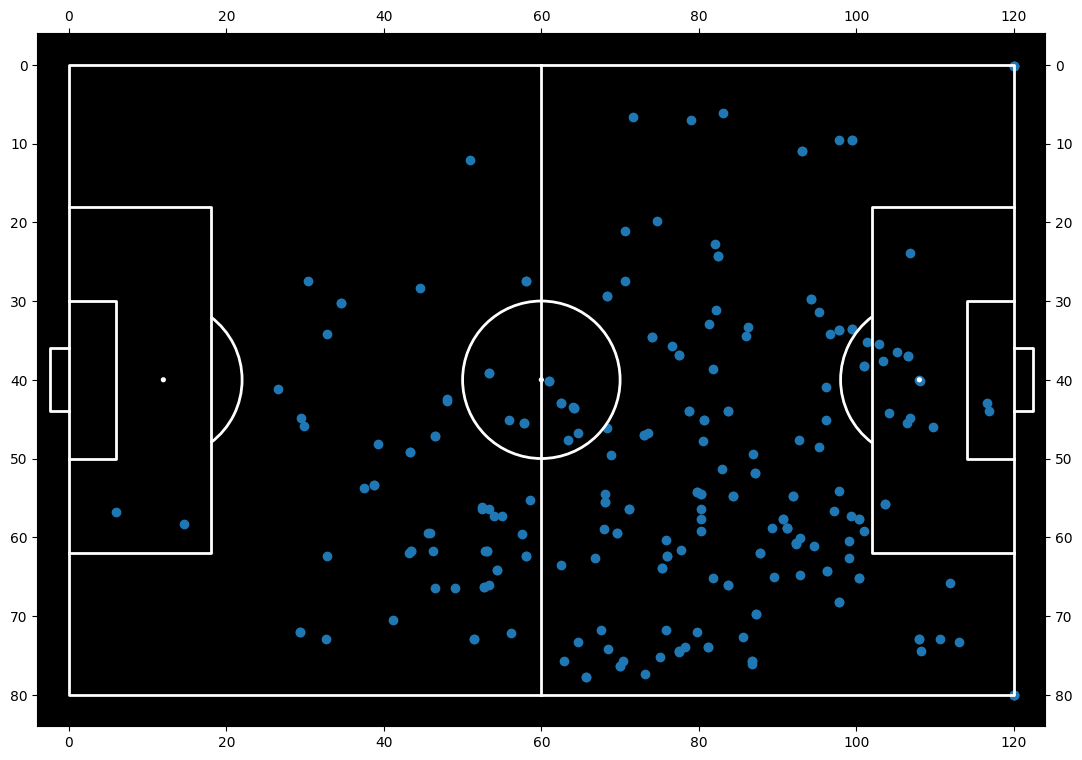

In [ ]:
#Estos son los toques que dio messi en la final del mundial
fig, ax = plt.subplots(figsize = (16,9))
pitch = Pitch(
    pitch_type="statsbomb",  # Tipo de campo de fútbol
    axis=True,  # Mostrar los ejes
    label=True,  # Etiquetas en los ejes
    tick=True,  # Marcas en los ejes
    goal_type="box",  # Tipo de portería
    pitch_color="black",  # Fondo del campo negro
    line_color="white",  # Líneas del campo blancas
    line_zorder=2  # Asegurarse que las líneas estén por encima del fondo
)

pitch.draw(ax=ax)

pitch.scatter(messi["x"],messi["y"], ax=ax)

**Mbappe**

In [ ]:
mbappe = partido[partido['player'] == 'Kylian Mbappé Lottin']

In [ ]:
mbappe[['x', 'y']] = mbappe['location'].apply(pd.Series)

<ipython-input-123-c69f491d4a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbappe[['x', 'y']] = mbappe['location'].apply(pd.Series)
<ipython-input-123-c69f491d4a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mbappe[['x', 'y']] = mbappe['location'].apply(pd.Series)


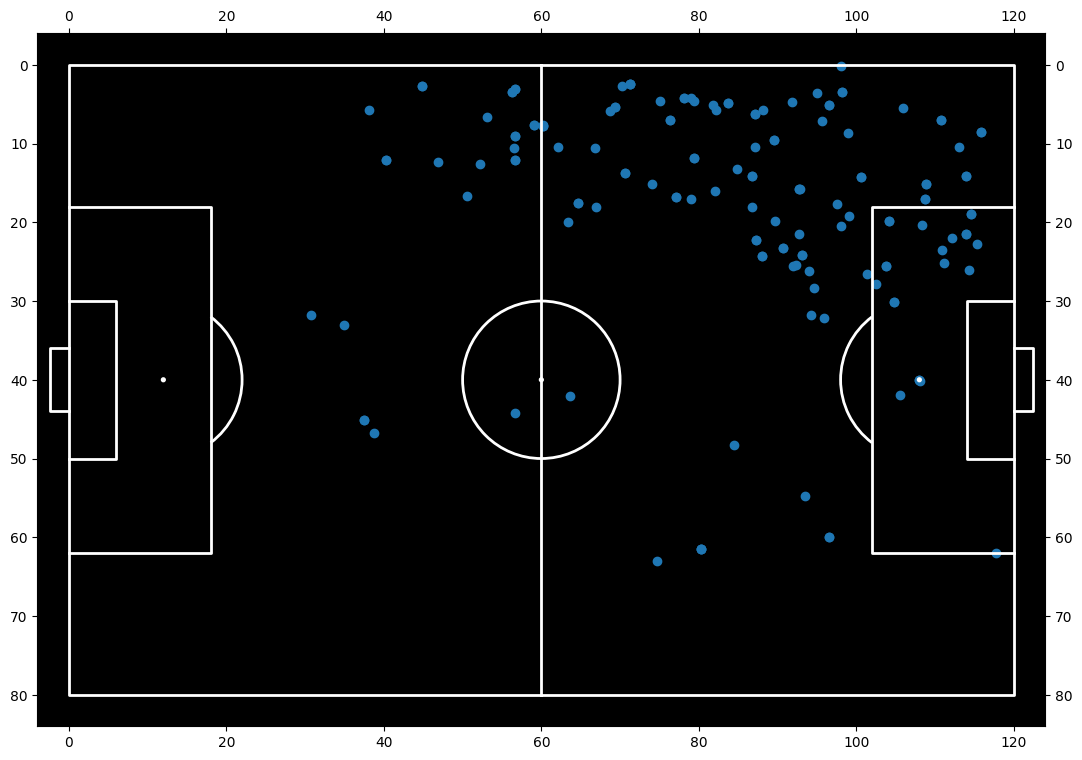

In [ ]:
#Comparamos a Messi y a Mbappe a ver quien dio mas pases en
fig, ax = plt.subplots(figsize = (16,9))
pitch = Pitch(
    pitch_type="statsbomb",  # Tipo de campo de fútbol
    axis=True,  # Mostrar los ejes
    label=True,  # Etiquetas en los ejes
    tick=True,  # Marcas en los ejes
    goal_type="box",  # Tipo de portería
    pitch_color="black",  # Fondo del campo negro
    line_color="white",  # Líneas del campo blancas
    line_zorder=2  # Asegurarse que las líneas estén por encima del fondo
)

pitch.draw(ax=ax)
pitch.scatter(mbappe["x"],mbappe["y"], ax=ax)

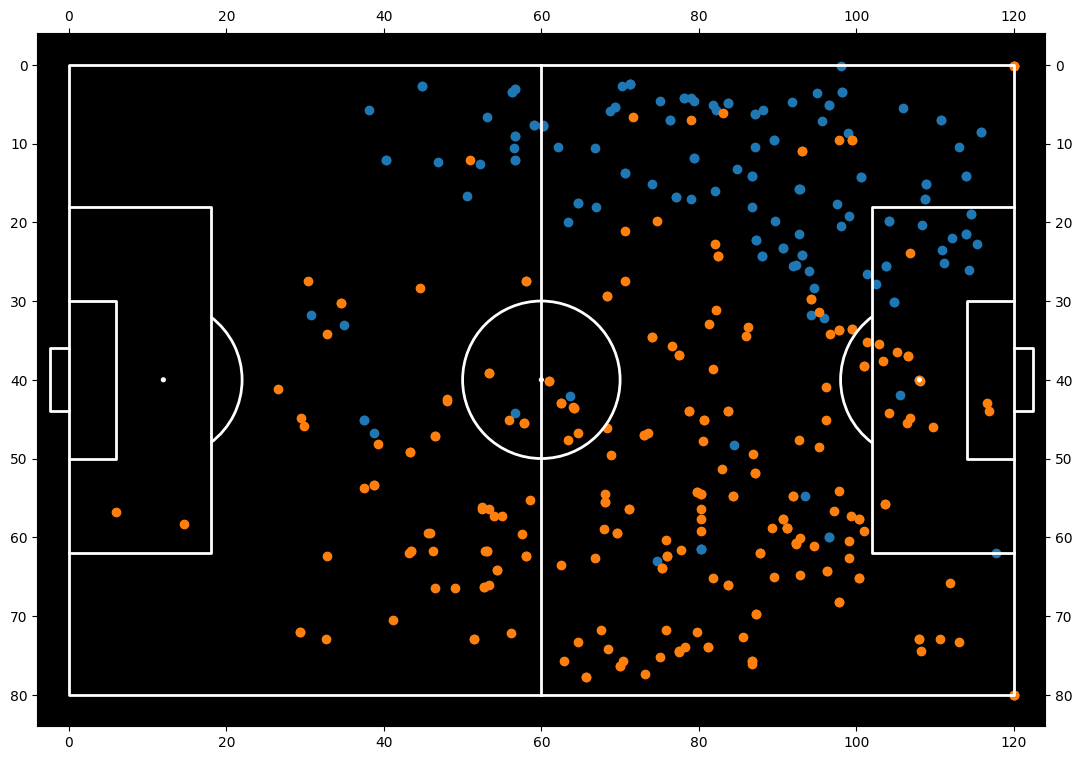

In [ ]:
#Comparamos a Messi y a Mbappe a ver quien dio mas pases en
fig, ax = plt.subplots(figsize = (16,9))
pitch = Pitch(
    pitch_type="statsbomb",  # Tipo de campo de fútbol
    axis=True,  # Mostrar los ejes
    label=True,  # Etiquetas en los ejes
    tick=True,  # Marcas en los ejes
    goal_type="box",  # Tipo de portería
    pitch_color="black",  # Fondo del campo negro
    line_color="white",  # Líneas del campo blancas
    line_zorder=2  # Asegurarse que las líneas estén por encima del fondo
)

pitch.draw(ax=ax)
pitch.scatter(mbappe["x"],mbappe["y"], ax=ax)
pitch.scatter(messi["x"],messi["y"], ax=ax)